# Things to do
    - add humidity column
    - add weekday column
    - one hot encoder cbwd and weekday columns
    - fill NaN with not NaN before
    - outliers
    - add past data columns

In [1]:
import pandas as pd
import numpy as np
from math import exp, isnan
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


## Add humidity column

In [3]:
def cal(temp, dewp):
    return 100*(exp((17.625*dewp)/(243.04+dewp))/exp((17.625*temp)/(243.04+temp)))
df['hum'] = [cal(temp, dewp) for temp, dewp in zip(df['TEMP'], df['DEWP'])]

## Add weekday column

In [4]:
# weekday = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# tmp = []
# for i, j, k in zip(df['day'], df['month'], df['year']):
#     date = weekday[datetime.strptime(str('{}/{}/{}'.format(i, j, k)), '%d/%m/%Y').weekday()]
#     tmp.append(date)
# df['weekday'] = tmp

## One Hot Encoder cbwd column

In [5]:
# df = pd.get_dummies(df)

## Fill NaN with not NaN before

In [6]:
df['pm2.5'].isna().sum()

2067

In [7]:
df['pm2.5'].fillna(method='ffill', inplace=True)

In [8]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,hum
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,43.543692
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,47.165689
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,43.543692
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,55.454538
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,51.426936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,18.340886
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,21.568601
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,21.568601
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,23.240409


## Outliers

In [9]:
dic = {}
for day, month, year, hour, pm25 in zip(df['day'], df['month'], df['year'], df['hour'], df['pm2.5']):
    dic[datetime.strptime(str('{}/{}/{} {}:00'.format(day, month, year, hour)), '%d/%m/%Y %H:%M')] = pm25

In [10]:
outlier_df = pd.DataFrame.from_dict(dic, orient='index', columns=['Value'])

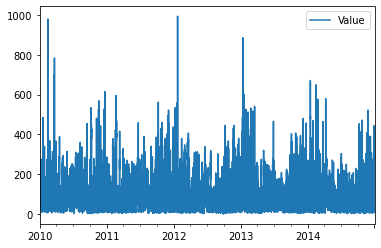

In [11]:
outlier_df.plot()
plt.show()

In [12]:
df = df[df['pm2.5'] <= 600]

In [13]:
df.corr()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,hum
No,1.000000,0.979818,0.198630,0.017443,0.000583,-0.009528,0.046393,0.077008,-0.024573,-0.062673,-0.029568,-0.016719,-0.013252
year,0.979818,1.000000,-0.000573,-0.001077,0.000154,-0.006876,0.000151,0.044835,-0.013069,-0.064370,-0.017062,-0.024493,-0.050575
month,0.198630,-0.000573,1.000000,0.009206,-0.000582,-0.021266,0.232543,0.167881,-0.061513,0.002493,-0.061901,0.036541,0.180682
day,0.017443,-0.001077,0.009206,1.000000,0.000052,0.081097,0.027328,0.013326,-0.006913,-0.009141,-0.036920,0.002559,0.028218
hour,0.000583,0.000154,-0.000582,0.000052,1.000000,-0.023593,-0.021267,0.150029,-0.041671,0.056610,-0.002391,-0.006322,-0.256729
pm2.5,-0.009528,-0.006876,-0.021266,0.081097,-0.023593,1.000000,0.183443,-0.071875,-0.061710,-0.246062,0.020398,-0.049038,0.440030
DEWP,0.046393,0.000151,0.232543,0.027328,-0.021267,0.183443,1.000000,0.824458,-0.778787,-0.297034,-0.034532,0.125006,0.622290
TEMP,0.077008,0.044835,0.167881,0.013326,0.150029,-0.071875,0.824458,1.000000,-0.827405,-0.155456,-0.092869,0.048932,0.095473
PRES,-0.024573,-0.013069,-0.061513,-0.006913,-0.041671,-0.061710,-0.778787,-0.827405,1.000000,0.185625,0.069082,-0.079816,-0.256052
Iws,-0.062673,-0.064370,0.002493,-0.009141,0.056610,-0.246062,-0.297034,-0.155456,0.185625,1.000000,0.021856,-0.010180,-0.309699


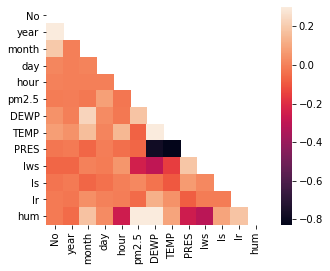

In [14]:
import seaborn as sns
data = df.corr()
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data, mask=mask, vmax=.3, square=True)

In [15]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,hum
No,1.000000,0.979818,0.198630,0.017443,0.000583,-0.009528,0.046393,0.077008,-0.024573,-0.062673,-0.029568,-0.016719,-0.013252
year,0.979818,1.000000,-0.000573,-0.001077,0.000154,-0.006876,0.000151,0.044835,-0.013069,-0.064370,-0.017062,-0.024493,-0.050575
month,0.198630,-0.000573,1.000000,0.009206,-0.000582,-0.021266,0.232543,0.167881,-0.061513,0.002493,-0.061901,0.036541,0.180682
day,0.017443,-0.001077,0.009206,1.000000,0.000052,0.081097,0.027328,0.013326,-0.006913,-0.009141,-0.036920,0.002559,0.028218
hour,0.000583,0.000154,-0.000582,0.000052,1.000000,-0.023593,-0.021267,0.150029,-0.041671,0.056610,-0.002391,-0.006322,-0.256729
pm2.5,-0.009528,-0.006876,-0.021266,0.081097,-0.023593,1.000000,0.183443,-0.071875,-0.061710,-0.246062,0.020398,-0.049038,0.440030
DEWP,0.046393,0.000151,0.232543,0.027328,-0.021267,0.183443,1.000000,0.824458,-0.778787,-0.297034,-0.034532,0.125006,0.622290
TEMP,0.077008,0.044835,0.167881,0.013326,0.150029,-0.071875,0.824458,1.000000,-0.827405,-0.155456,-0.092869,0.048932,0.095473
PRES,-0.024573,-0.013069,-0.061513,-0.006913,-0.041671,-0.061710,-0.778787,-0.827405,1.000000,0.185625,0.069082,-0.079816,-0.256052
Iws,-0.062673,-0.064370,0.002493,-0.009141,0.056610,-0.246062,-0.297034,-0.155456,0.185625,1.000000,0.021856,-0.010180,-0.309699


In [16]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,hum
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,38.784785
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,42.130158
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,62.793843
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,85.857955
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,85.857955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,18.340886
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,21.568601
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,21.568601
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,23.240409


## Add past data columns

In [17]:
need_shift = ['pm2.5', 'DEWP', 'TEMP']
for var in need_shift:
    for i in range(1, 2):
        key = var + '_' + str(i)
        df[key] = df[var].shift(periods=i)
for var in ['pm2.5']:
    for i in range(1, 3):
        key = var + '_' + str(i)
        df[key] = df[var].shift(periods=i)        
df.dropna(inplace=True)

<ipython-input-17-3e0cf9859ccc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[var].shift(periods=i)
<ipython-input-17-3e0cf9859ccc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = df[var].shift(periods=i)
<ipython-input-17-3e0cf9859ccc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(i

In [18]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir', 'hum', 'pm2.5_1', 'DEWP_1', 'TEMP_1',
       'pm2.5_2'],
      dtype='object')

In [19]:
features = list(df.columns[9:])
predicts = list(df.columns[5:8])

In [20]:
features

['cbwd', 'Iws', 'Is', 'Ir', 'hum', 'pm2.5_1', 'DEWP_1', 'TEMP_1', 'pm2.5_2']

In [21]:
features.remove('cbwd')
features.remove('Is')
features.remove('Ir')

In [22]:
X = df[features]
y = df[predicts]

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3)

## Modeling

In [24]:
random_forest = RandomForestRegressor() 

In [25]:
# random_forest.fit(Xtrain, ytrain)
# random_forest.score(Xtrain, ytrain)

# No split data anymore, to train more
random_forest.fit(Xtrain, ytrain)
random_forest.score(Xtrain, ytrain)

0.9961397957344321

In [26]:
ytest = ytest.values

In [27]:
def cal():
    data = [0] * 3
    for i in range(len(predict)):
        for j in range(3):
            data[j] += abs(predict[i][j] - ytest[i][j])
    for i in range(3):
        data[i] /= len(predict)
    return (data[0], data[1], data[2])

In [28]:
predict = random_forest.predict(Xtest)
print('R^2 score:', r2_score(predict, ytest))
print('Mean Absolute Error:', mean_absolute_error(predict, ytest))

R^2 score: 0.9695123102785103
Mean Absolute Error: 4.906480135880234


In [29]:
features

['Iws', 'hum', 'pm2.5_1', 'DEWP_1', 'TEMP_1', 'pm2.5_2']

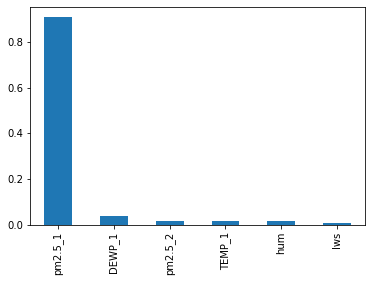

In [30]:
foo = pd.Series(random_forest.feature_importances_, index=features)
foo.nlargest(100).plot(kind='bar')

In [31]:
cal()

(12.818022347134574, 0.8844783383603074, 1.0169397221458216)

## Predict for next 6 hours

In [32]:
for i in range(6):
    tail = pd.concat([df.tail(1)], ignore_index=True)
    tail.loc[:, ['day', 'month', 'year', 'hour']] = [1, 1, 2015, i]
    df = pd.concat([df, tail], ignore_index=True)
    df.loc[len(df) - 1:, predicts] = random_forest.predict(tail[features])
    for var in need_shift:
        for i in range(1, 6):
            key = var + '_' + str(i)
            df[key] = df[var].shift(periods=i)

In [33]:
df.tail(6)[['day', 'month', 'year', 'hour'] + predicts]

,day,month,year,hour,pm2.5,DEWP,TEMP
43763,1,1,2015,0,9.79,-21.79,-3.74
43764,1,1,2015,1,12.99,-21.40,-3.66
43765,1,1,2015,2,10.91,-21.65,-3.45
43766,1,1,2015,3,15.68,-21.30,-3.76
43767,1,1,2015,4,14.37,-21.37,-3.55
43768,1,1,2015,5,16.22,-21.35,-3.76


- season
- trend
- statistical models for time serries
- how data transform by times (up or down, low or high)
- past data for weekdays or for pm2.5 last year
- k fold cross validation for time series